In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# carrega dataset 2022
df_enem_2022 = pd.read_csv('../../data/enem_2022_v2.csv')

## Relação socioeconomica/ estrutura familiar

A correlação entre a nota de um aluno no ENEM e a quantidade de pessoas que moram com ele na mesma residência pode ser influenciada por uma variedade de fatores. Aqui estão algumas considerações sobre possíveis correlações entre essas duas variáveis:

Acesso a Recursos Educacionais: A quantidade de pessoas que moram na mesma residência pode impactar o acesso do aluno a recursos educacionais. Se houver muitas pessoas na casa e recursos limitados, como espaço tranquilo para estudar, acesso a livros e materiais de estudo, a nota do aluno no ENEM pode ser afetada negativamente.

Ambiente de Estudo: Um ambiente de estudo adequado é importante para o desempenho acadêmico. Se a residência for barulhenta, cheia de distrações ou com falta de espaço para estudo, isso pode influenciar negativamente a nota do aluno.

Apoio Familiar: Ter um ambiente de apoio em casa, onde os membros da família incentivam e valorizam a educação, pode ter um impacto positivo nas notas do ENEM. Se a família está envolvida no processo educacional do aluno, isso pode motivá-lo a se esforçar mais nos estudos.

Nível Socioeconômico: A quantidade de pessoas na residência pode estar correlacionada com o nível socioeconômico da família. Em geral, famílias de menor renda podem enfrentar mais desafios financeiros, o que pode afetar negativamente a disponibilidade de recursos para apoio aos estudos.

Tempo Disponível: Em famílias maiores, pode haver mais responsabilidades compartilhadas, como cuidar de irmãos mais novos ou ajudar nas tarefas domésticas. Isso pode limitar o tempo disponível para o aluno estudar, o que pode impactar suas notas.

Nível de Estresse e Bem-Estar: A dinâmica familiar, incluindo possíveis conflitos ou estresse, pode afetar o bem-estar emocional do aluno. O estresse excessivo pode prejudicar a capacidade de concentração e aprendizado, o que pode impactar as notas.


### Quantidade média de pessoa que moram na residência com o aluno em cada Estado

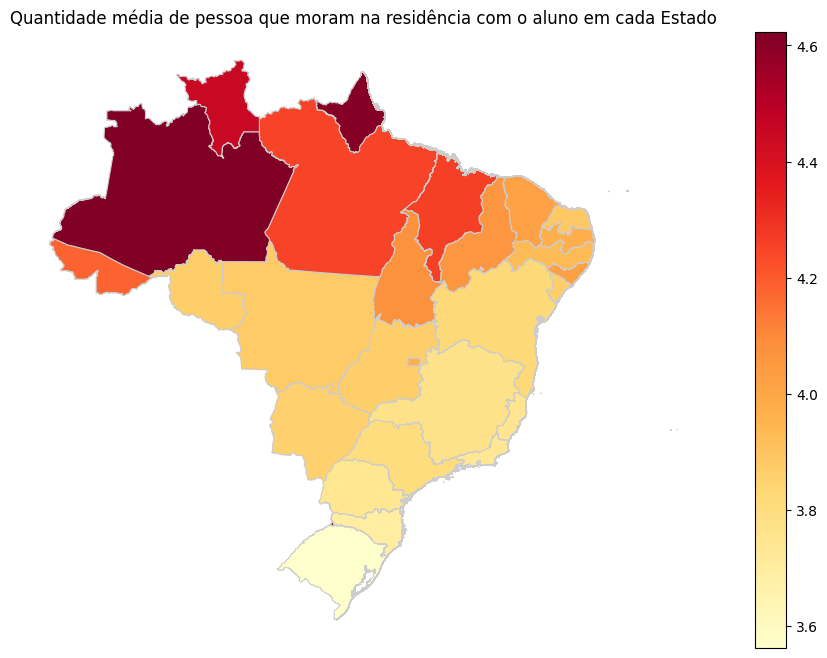

In [3]:
# Carregar o mapa geoespacial
mapa = gpd.read_file('../../data/brazil_geo.json')

# Calculando a média da quantidade de pessoas que moram na residência com o aluno por estado
df_enem_2022['media_qtd_moradores'] = df_enem_2022.groupby('SG_UF_ESC')['Q005'].transform('mean')

# Mesclar os dados do mapa com as médias da quantidade de moradores
mescla = mapa.merge(df_enem_2022.groupby('SG_UF_ESC')['media_qtd_moradores'].mean().reset_index(), left_on='id', right_on='SG_UF_ESC', how='left')

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mescla.plot(column='media_qtd_moradores', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurações do gráfico
ax.set_title('Quantidade média de pessoa que moram na residência com o aluno em cada Estado')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()

### Média das notas por estado

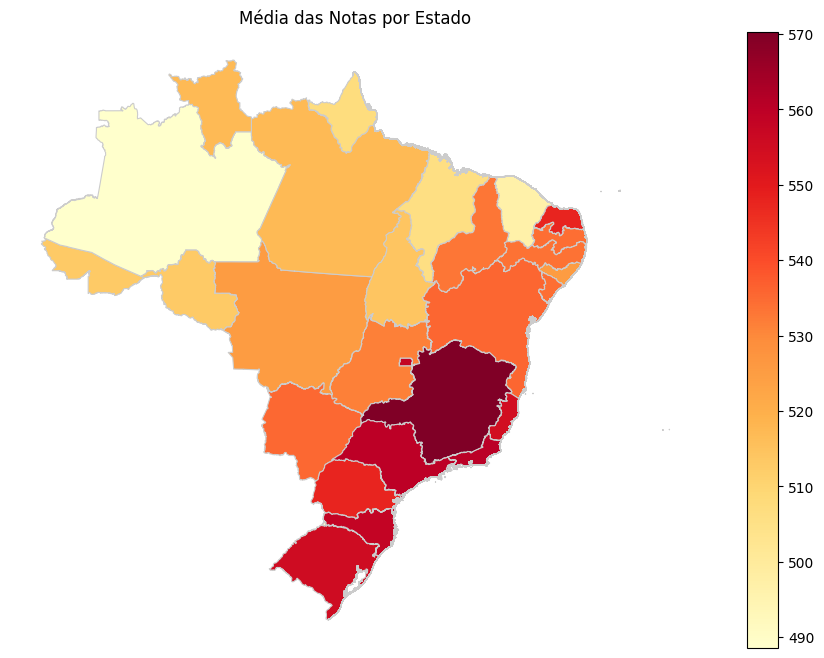

In [4]:

# Carregar o mapa geoespacial
mapa = gpd.read_file('../../data/brazil_geo.json')

# Calcular a média das notas das colunas especificadas
df_enem_2022['media_notas'] = df_enem_2022[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

# Mesclar os dados do mapa com as médias de notas
mescla = mapa.merge(df_enem_2022.groupby('SG_UF_ESC')['media_notas'].mean().reset_index(), left_on='id', right_on='SG_UF_ESC', how='left')

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mescla.plot(column='media_notas', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurações do gráfico
ax.set_title('Média das Notas por Estado')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()

### Média nota em Matemática por estado

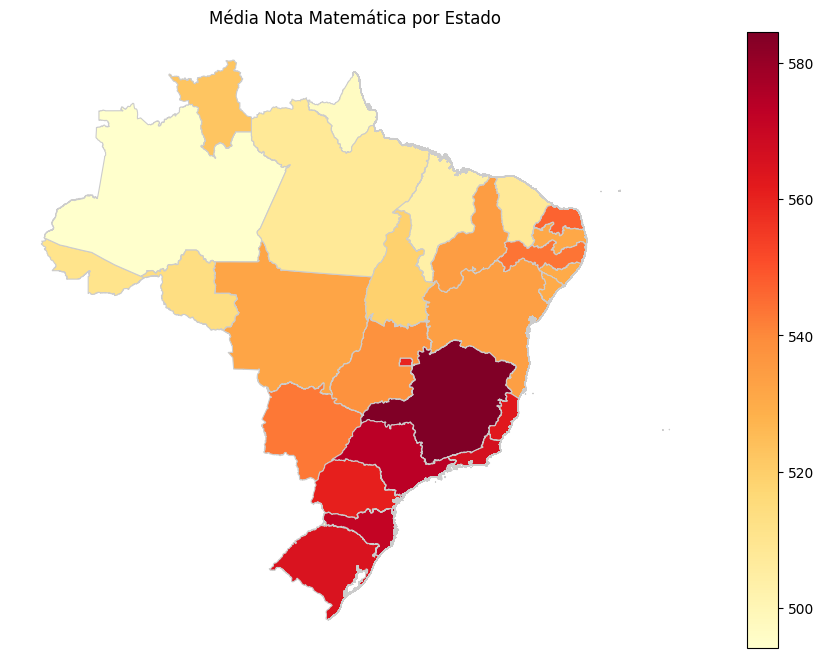

In [5]:
# Carregar o mapa geoespacial
mapa = gpd.read_file('../../data/brazil_geo.json')

# Calcular a média das notas das colunas especificadas
#df_enem_2022['media_notas'] = df_enem_2022[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

# Mesclar os dados do mapa com as médias de notas
mescla = mapa.merge(df_enem_2022.groupby('SG_UF_ESC')['NU_NOTA_MT'].mean().reset_index(), left_on='id', right_on='SG_UF_ESC', how='left')

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mescla.plot(column='NU_NOTA_MT', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurações do gráfico
ax.set_title('Média Nota Matemática por Estado')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()

### Média nota em Redação por estado

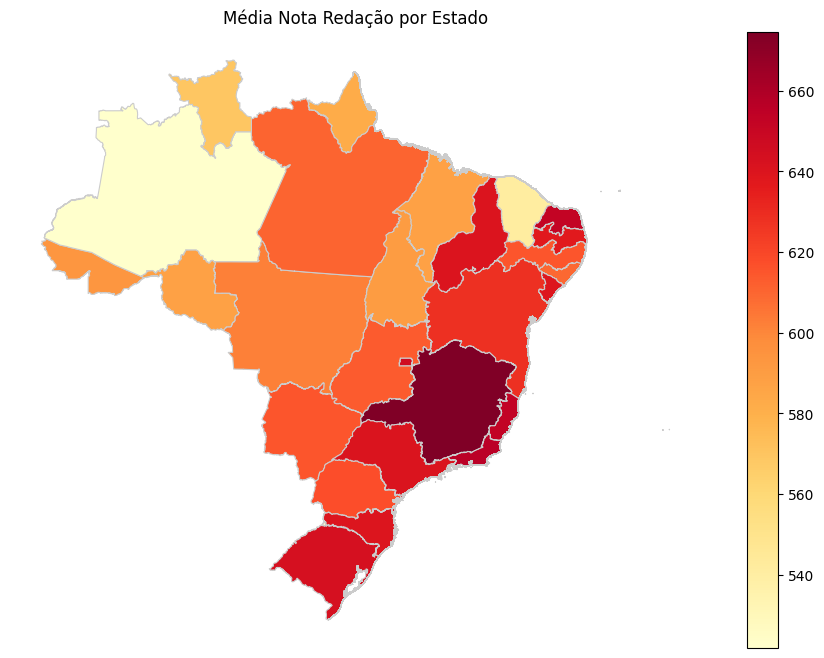

In [7]:
# Carregar o mapa geoespacial
mapa = gpd.read_file('../../data/brazil_geo.json')

# Calcular a média das notas das colunas especificadas
#df_enem_2022['media_notas'] = df_enem_2022[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

# Mesclar os dados do mapa com as médias de notas
mescla = mapa.merge(df_enem_2022.groupby('SG_UF_ESC')['NU_NOTA_REDACAO'].mean().reset_index(), left_on='id', right_on='SG_UF_ESC', how='left')

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mescla.plot(column='NU_NOTA_REDACAO', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurações do gráfico
ax.set_title('Média Nota Redação por Estado')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()